Soil Pollution Analysis: Identifying the Most Harmful Pollutants

Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

Set style

In [3]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

Load and Explore Data

In [4]:
df = pd.read_csv('soil_pollution_diseases.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nPollutant types: {df['Pollutant_Type'].unique()}")

Dataset shape: (3000, 24)

Pollutant types: ['Lead' 'Chromium' 'Pesticides' 'Mercury' 'Cadmium' 'Arsenic']


Basic information

In [5]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Case_ID                            0
Date_Reported                      0
Region                             0
Country                            0
Pollutant_Type                     0
Pollutant_Concentration_mg_kg      0
Soil_pH                            0
Temperature_C                      0
Humidity_%                         0
Rainfall_mm                        0
Crop_Type                          0
Farming_Practice                   0
Nearby_Industry                  582
Water_Source_Type                  0
Soil_Texture                       0
Soil_Organic_Matter_%              0
Disease_Type                       0
Disease_Severity                   0
Health_Symptoms                    0
Age_Group_Affected                 0
Gender_Most_Affected               0
Mitigation_Measure                 0
Case_Resolved                      0
Follow_Up_Required                 0
dtype: int64


Data Preprocessing

Convert Date_Reported to datetime

In [6]:
df['Date_Reported'] = pd.to_datetime(df['Date_Reported'])

Extract year for temporal analysis

In [7]:
df['Year'] = df['Date_Reported'].dt.year

Create Severity_Score column for analysis

In [8]:
severity_mapping = {'Mild': 1, 'Moderate': 2, 'Severe': 3}
df['Severity_Score'] = df['Disease_Severity'].map(severity_mapping)

Analysis 1: Pollutant Distribution and Concentration

In [9]:
plt.figure(figsize=(14, 8))
pollutant_stats = df.groupby('Pollutant_Type')['Pollutant_Concentration_mg_kg'].agg(['mean', 'count', 'std'])
pollutant_stats = pollutant_stats.sort_values('mean', ascending=False)

<Figure size 1400x800 with 0 Axes>

Plot average concentration by pollutant type

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Pesticides'),
  Text(1, 0, 'Lead'),
  Text(2, 0, 'Chromium'),
  Text(3, 0, 'Cadmium'),
  Text(4, 0, 'Mercury'),
  Text(5, 0, 'Arsenic')])

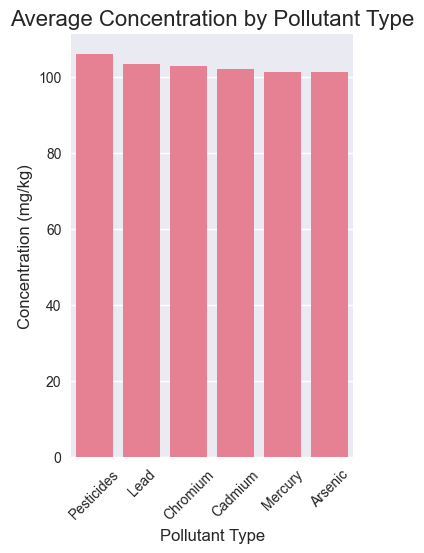

In [10]:
plt.subplot(1, 2, 1)
sns.barplot(x=pollutant_stats.index, y=pollutant_stats['mean'])
plt.title('Average Concentration by Pollutant Type', fontsize=16)
plt.xlabel('Pollutant Type', fontsize=12)
plt.ylabel('Concentration (mg/kg)', fontsize=12)
plt.xticks(rotation=45)

Plot number of cases by pollutant type

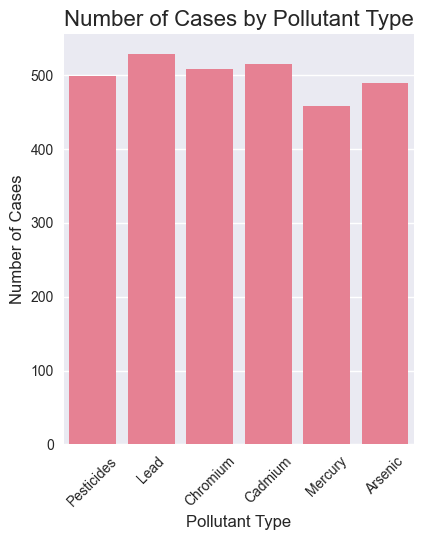

In [11]:
plt.subplot(1, 2, 2)
sns.barplot(x=pollutant_stats.index, y=pollutant_stats['count'])
plt.title('Number of Cases by Pollutant Type', fontsize=16)
plt.xlabel('Pollutant Type', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Statistical comparison of pollutant concentrations

In [12]:
pollutants = df['Pollutant_Type'].unique()
for i in range(len(pollutants)):
    for j in range(i+1, len(pollutants)):
        stat, p_value = stats.ttest_ind(
            df[df['Pollutant_Type'] == pollutants[i]]['Pollutant_Concentration_mg_kg'],
            df[df['Pollutant_Type'] == pollutants[j]]['Pollutant_Concentration_mg_kg'],
            nan_policy='omit'
        )
        if p_value < 0.05:
            print(f"Significant difference between {pollutants[i]} and {pollutants[j]}: p={p_value:.4f}")

Analysis 2: Disease Types Associated with Different Pollutants

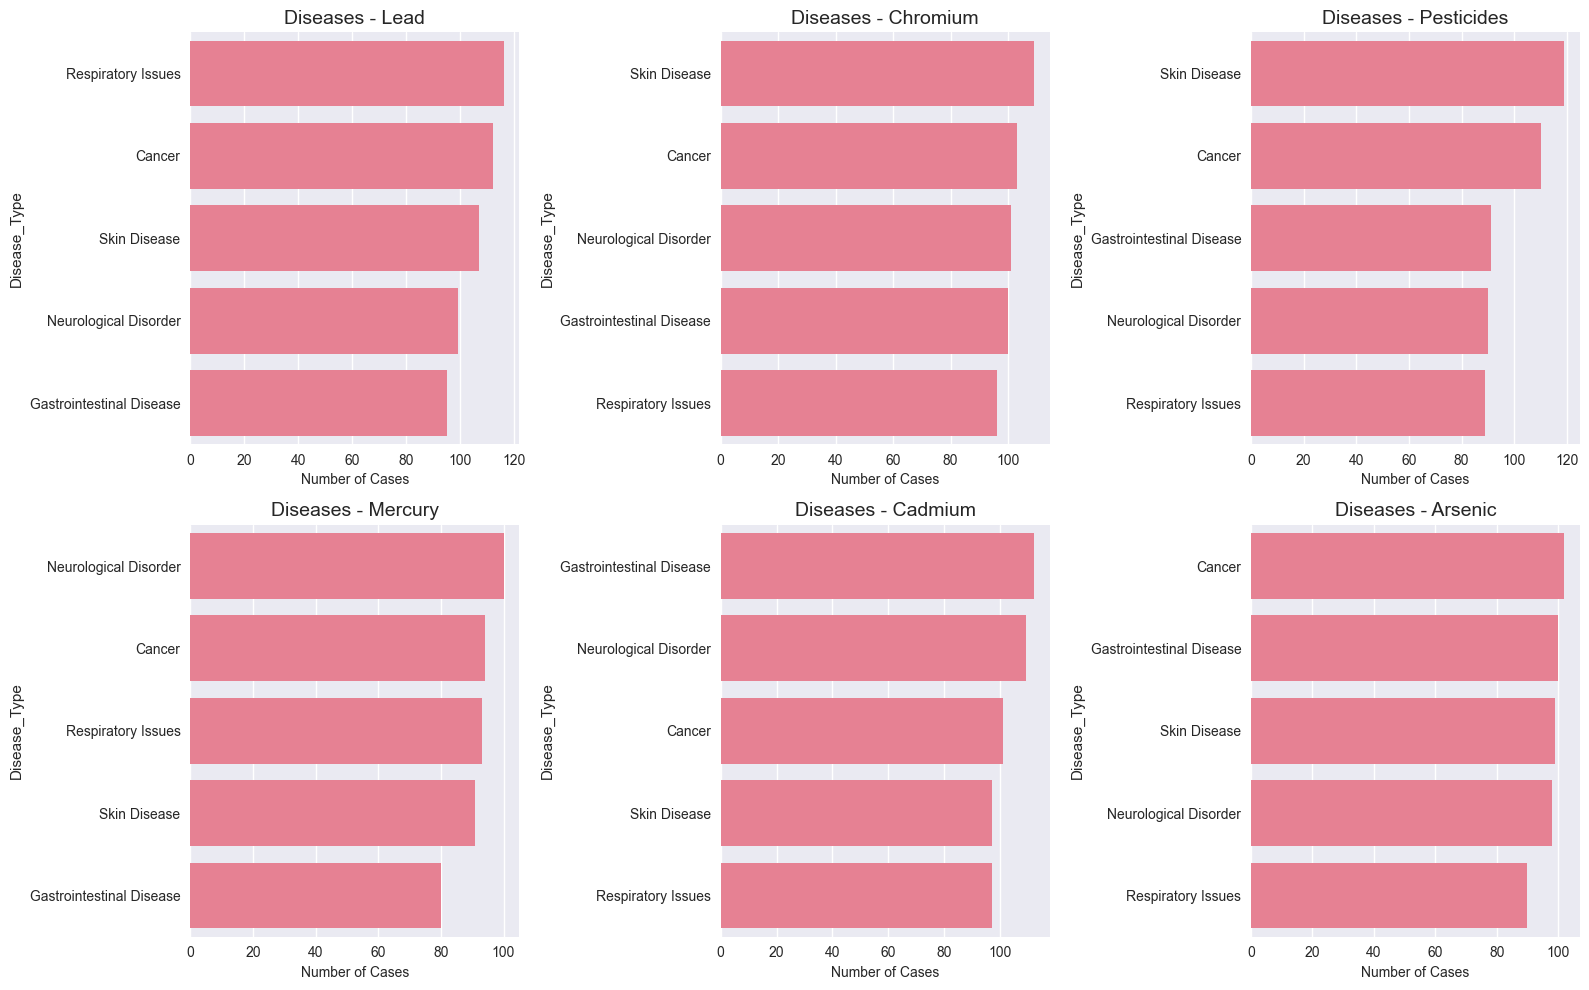

In [13]:
plt.figure(figsize=(16, 10))
for i, pollutant in enumerate(df['Pollutant_Type'].unique(), 1):
    plt.subplot(2, 3, i)
    pollutant_diseases = df[df['Pollutant_Type'] == pollutant]['Disease_Type'].value_counts()
    sns.barplot(x=pollutant_diseases.values, y=pollutant_diseases.index)
    plt.title(f'Diseases - {pollutant}', fontsize=14)
    plt.xlabel('Number of Cases', fontsize=10)
plt.tight_layout()
plt.show()

Analysis 3: Severity Analysis by Pollutant

In [14]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Boxplot of concentration by pollutant and severity

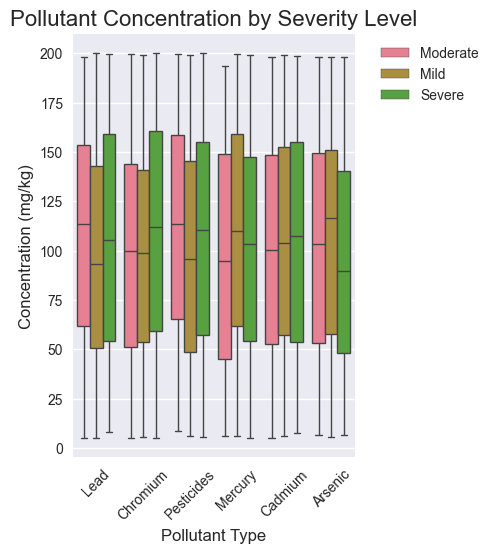

In [15]:
plt.subplot(1, 2, 1)
sns.boxplot(x='Pollutant_Type', y='Pollutant_Concentration_mg_kg', hue='Disease_Severity', data=df)
plt.title('Pollutant Concentration by Severity Level', fontsize=16)
plt.xlabel('Pollutant Type', fontsize=12)
plt.ylabel('Concentration (mg/kg)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Average severity score by pollutant

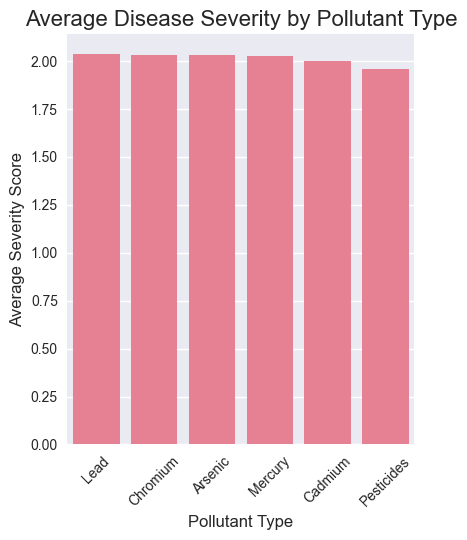

In [16]:
plt.subplot(1, 2, 2)
severity_by_pollutant = df.groupby('Pollutant_Type')['Severity_Score'].mean().sort_values(ascending=False)
sns.barplot(x=severity_by_pollutant.index, y=severity_by_pollutant.values)
plt.title('Average Disease Severity by Pollutant Type', fontsize=16)
plt.xlabel('Pollutant Type', fontsize=12)
plt.ylabel('Average Severity Score', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Analysis 4: Geographic Distribution of Pollutants

Top countries for each pollutant

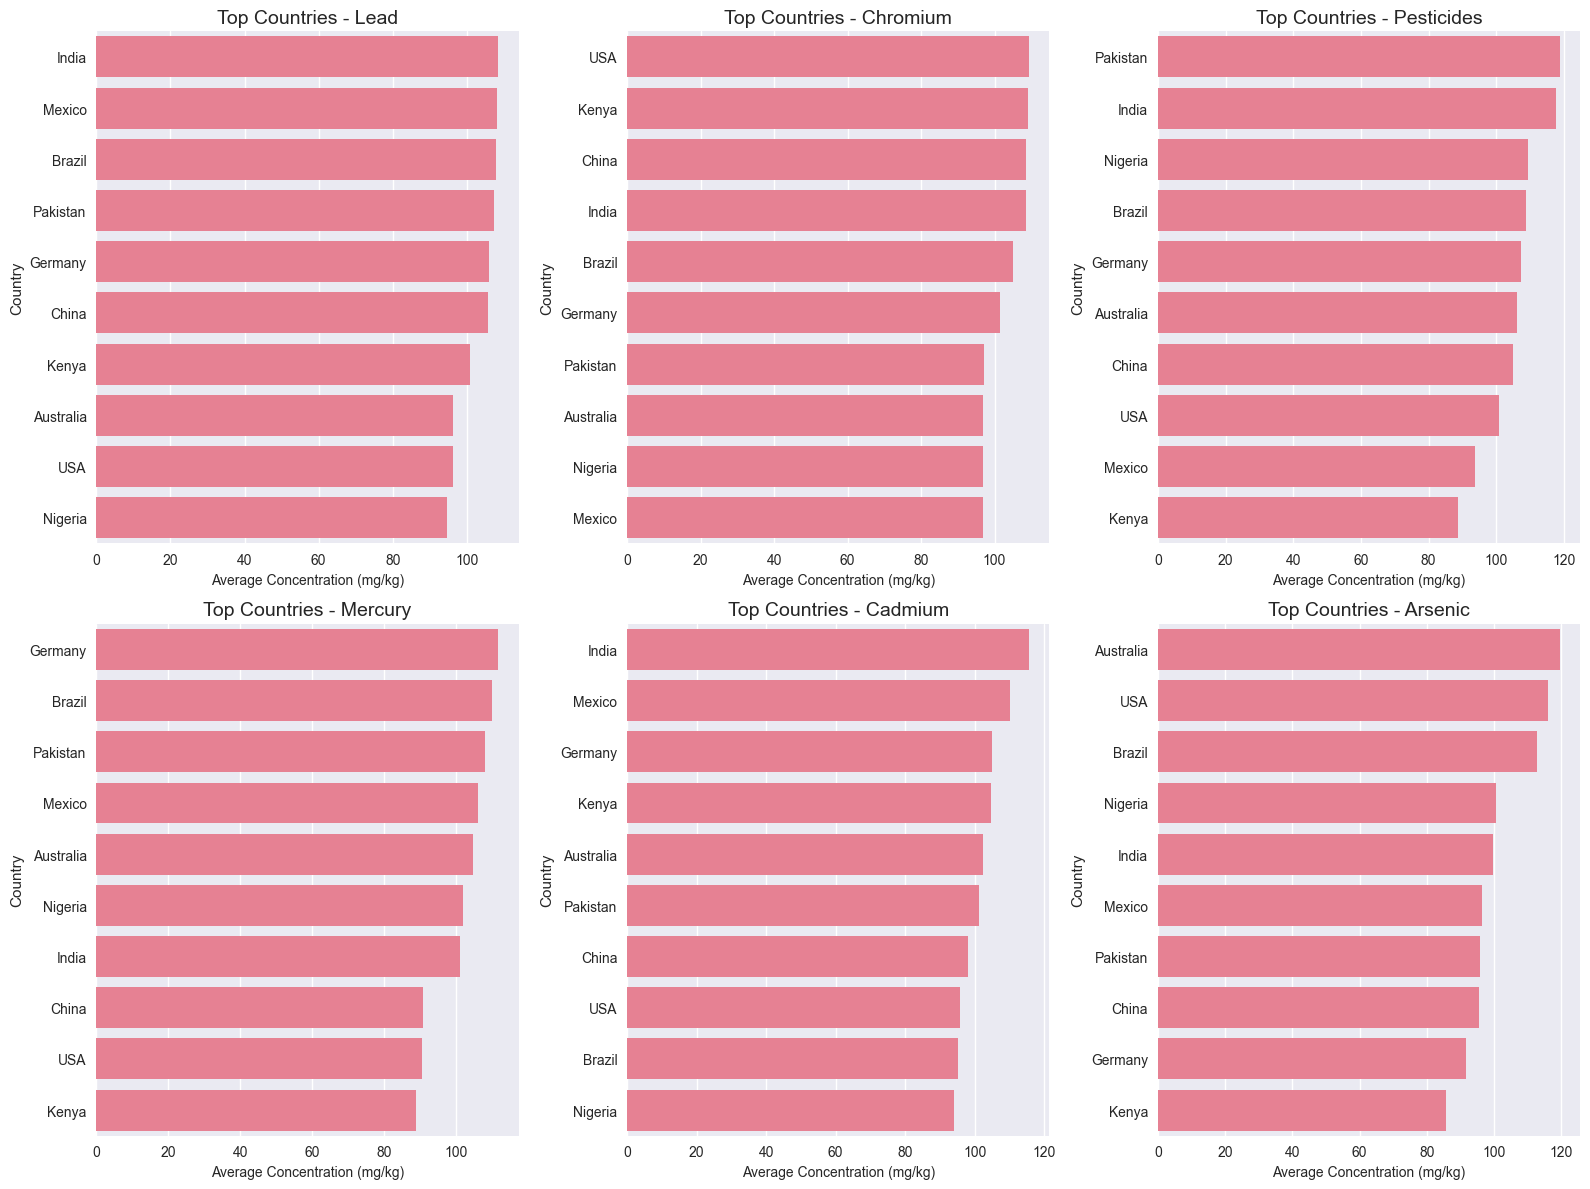

In [17]:
plt.figure(figsize=(16, 12))
for i, pollutant in enumerate(df['Pollutant_Type'].unique(), 1):
    plt.subplot(2, 3, i)
    pollutant_data = df[df['Pollutant_Type'] == pollutant]
    country_stats = pollutant_data.groupby('Country')['Pollutant_Concentration_mg_kg'].mean().nlargest(10)
    sns.barplot(x=country_stats.values, y=country_stats.index)
    plt.title(f'Top Countries - {pollutant}', fontsize=14)
    plt.xlabel('Average Concentration (mg/kg)', fontsize=10)
plt.tight_layout()
plt.show()

Analysis 5: Environmental Factors Correlation with Pollution

Select numerical features for correlation analysis

In [18]:
numerical_features = [
    'Pollutant_Concentration_mg_kg', 
    'Soil_pH', 
    'Temperature_C',
    'Humidity_%', 
    'Rainfall_mm', 
    'Soil_Organic_Matter_%',
    'Severity_Score'
]

Calculate correlation matrix

In [19]:
correlation_matrix = df[numerical_features].corr()

Plot heatmap

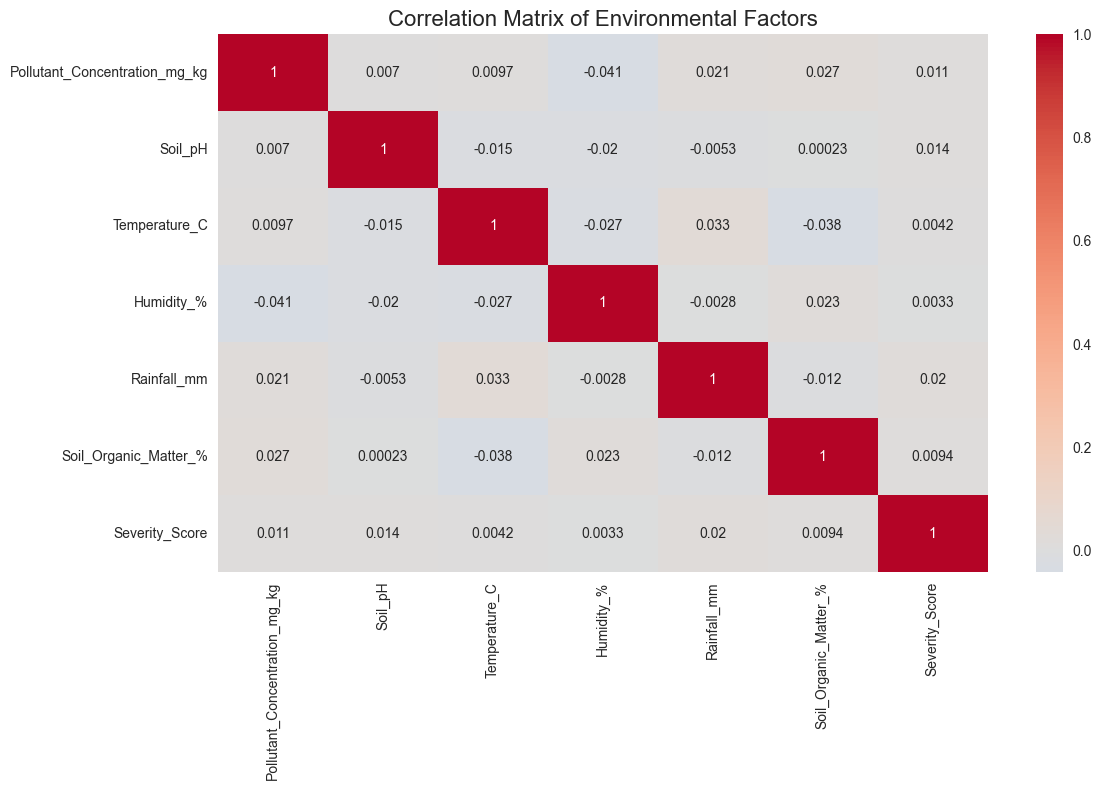

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Environmental Factors', fontsize=16)
plt.tight_layout()
plt.show()

Analysis 6: Multivariate Analysis - Clustering of Pollution Cases

Prepare data for clustering

In [21]:
cluster_features = [
    'Pollutant_Concentration_mg_kg', 
    'Soil_pH', 
    'Temperature_C',
    'Humidity_%', 
    'Rainfall_mm', 
    'Soil_Organic_Matter_%'
]

cluster_data = df[cluster_features].copy()

Handle missing values

In [22]:
cluster_data = cluster_data.fillna(cluster_data.mean())

Scale the data

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

Determine optimal number of clusters using elbow method

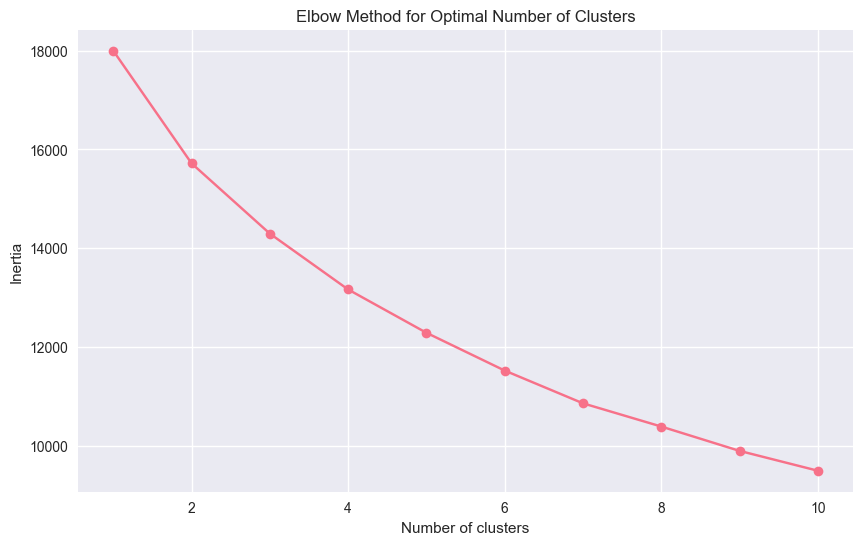

In [24]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

Apply K-means clustering

In [25]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

Visualize clusters using PCA

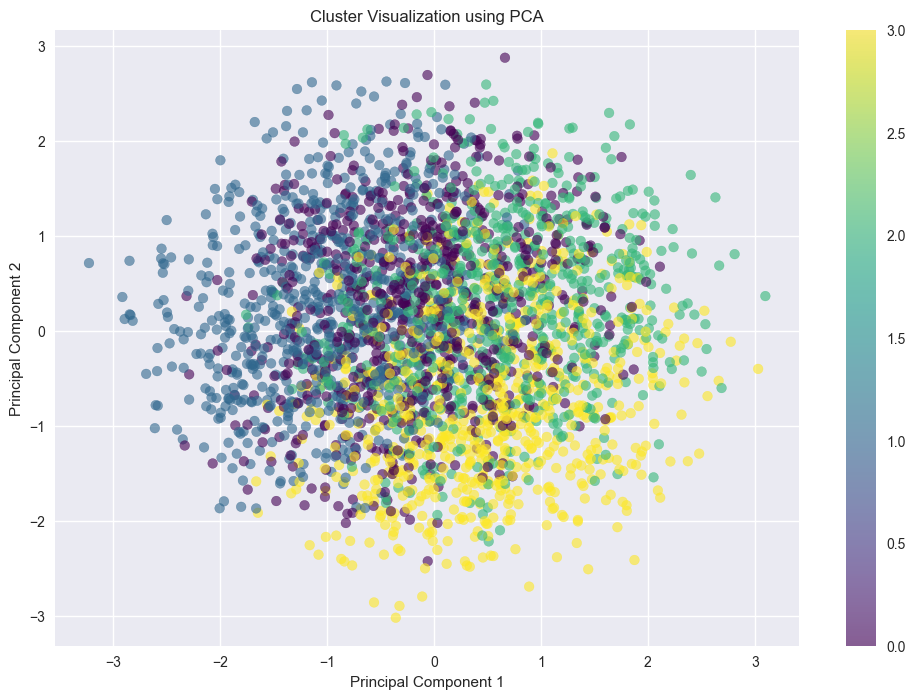

In [26]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization using PCA')
plt.show()

Analyze cluster characteristics

In [27]:
cluster_analysis = df.groupby('Cluster')[cluster_features].mean()
print("\nCluster Characteristics:")
print(cluster_analysis)


Cluster Characteristics:
         Pollutant_Concentration_mg_kg   Soil_pH  Temperature_C  Humidity_%  \
Cluster                                                                       
0                           108.180376  6.608671      18.633154   60.037584   
1                            96.921915  6.495178      19.407398   60.317173   
2                           110.250327  7.508529      36.133787   54.965395   
3                            96.006217  5.287526      34.790576   57.507723   

         Rainfall_mm  Soil_Organic_Matter_%  
Cluster                                      
0         301.877584               5.183235  
1          83.930911               5.516354  
2         201.248774               5.175422  
3         215.705105               4.828704  


Pollutant distribution across clusters

In [28]:
cluster_pollutant = pd.crosstab(df['Cluster'], df['Pollutant_Type'], normalize='index')
print("\nPollutant Distribution across Clusters:")
print(cluster_pollutant)


Pollutant Distribution across Clusters:
Pollutant_Type   Arsenic   Cadmium  Chromium      Lead   Mercury  Pesticides
Cluster                                                                     
0               0.169128  0.166443  0.195973  0.170470  0.142282    0.155705
1               0.177015  0.182299  0.171731  0.167768  0.143989    0.157199
2               0.164850  0.156676  0.152589  0.183924  0.152589    0.189373
3               0.141361  0.181937  0.158377  0.183246  0.171466    0.163613


Analysis 7: Temporal Trends of Different Pollutants

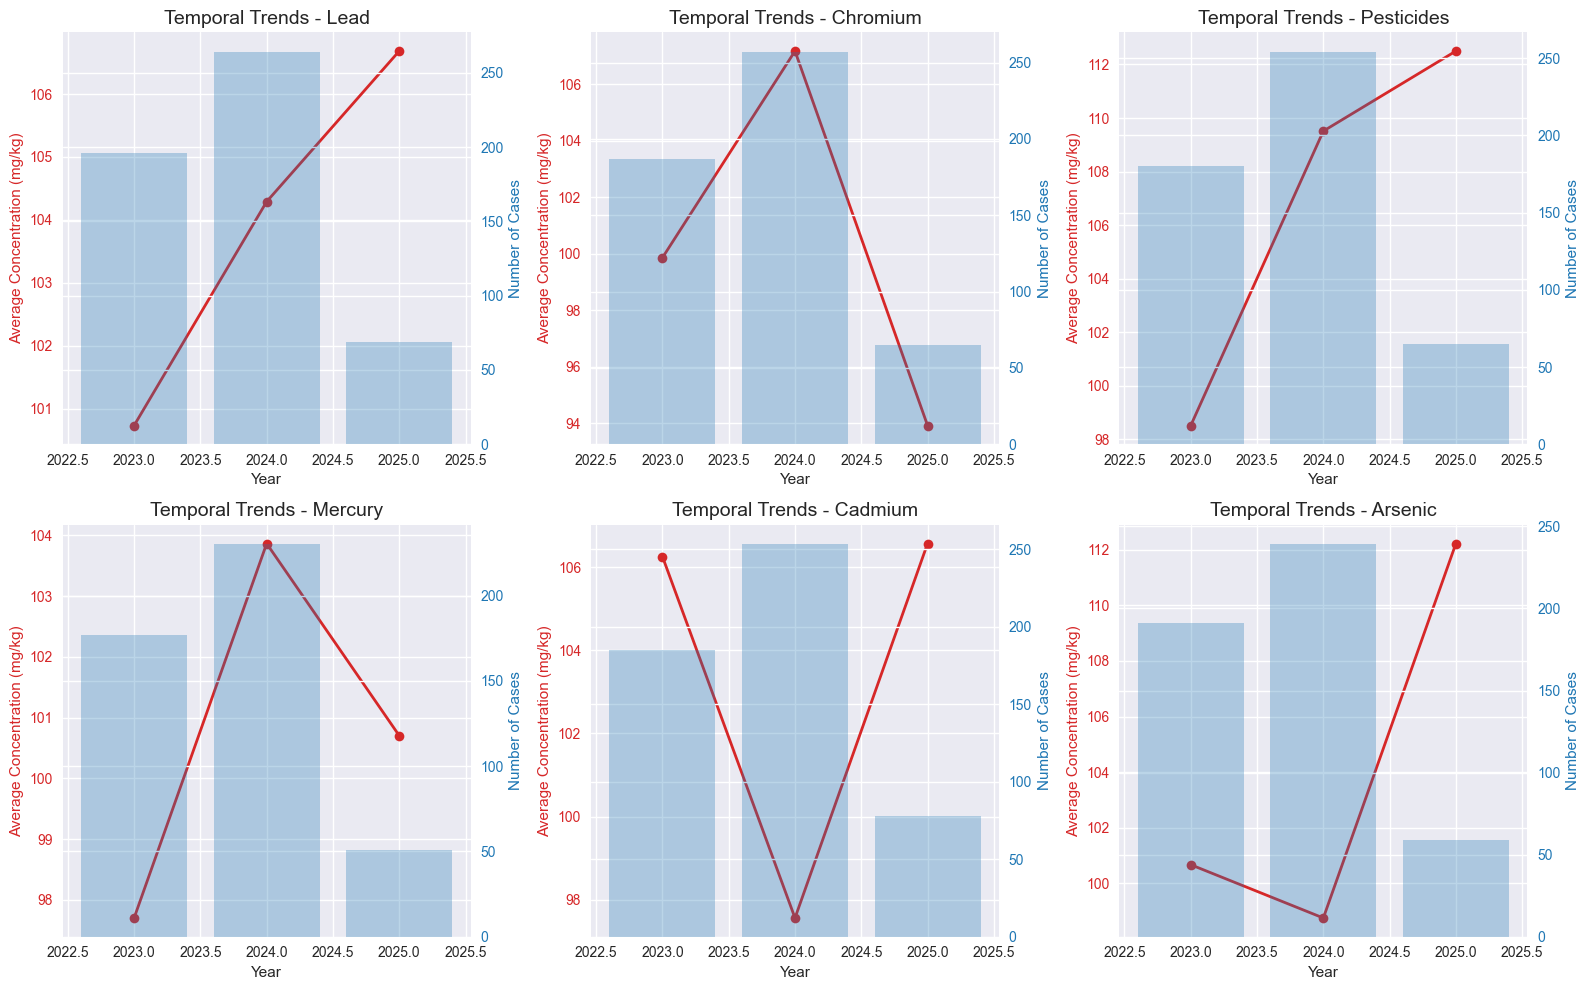

In [29]:
plt.figure(figsize=(16, 10))

for i, pollutant in enumerate(df['Pollutant_Type'].unique(), 1):
    plt.subplot(2, 3, i)
    pollutant_data = df[df['Pollutant_Type'] == pollutant]
    temporal_trend = pollutant_data.groupby('Year').agg({
        'Pollutant_Concentration_mg_kg': 'mean',
        'Case_ID': 'count'
    }).rename(columns={'Case_ID': 'Case_Count'})
    
    ax1 = plt.gca()
    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average Concentration (mg/kg)', color=color)
    ax1.plot(temporal_trend.index, temporal_trend['Pollutant_Concentration_mg_kg'], 
             color=color, marker='o', linewidth=2)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Number of Cases', color=color)
    ax2.bar(temporal_trend.index, temporal_trend['Case_Count'], 
            color=color, alpha=0.3)
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title(f'Temporal Trends - {pollutant}', fontsize=14)

plt.tight_layout()
plt.show()

Analysis 8: Most Dangerous Pollutant Assessment

Calculate danger score based on concentration and severity

In [30]:
pollutant_danger = df.groupby('Pollutant_Type').agg({
    'Pollutant_Concentration_mg_kg': 'mean',
    'Severity_Score': 'mean',
    'Case_ID': 'count'
}).rename(columns={'Case_ID': 'Case_Count'})

Normalize the metrics

In [31]:
pollutant_danger['Norm_Concentration'] = (pollutant_danger['Pollutant_Concentration_mg_kg'] - 
                                         pollutant_danger['Pollutant_Concentration_mg_kg'].min()) / \
                                        (pollutant_danger['Pollutant_Concentration_mg_kg'].max() - 
                                         pollutant_danger['Pollutant_Concentration_mg_kg'].min())
                                         
pollutant_danger['Norm_Severity'] = (pollutant_danger['Severity_Score'] - 
                                    pollutant_danger['Severity_Score'].min()) / \
                                   (pollutant_danger['Severity_Score'].max() - 
                                    pollutant_danger['Severity_Score'].min())
                                    
pollutant_danger['Norm_Frequency'] = (pollutant_danger['Case_Count'] - 
                                     pollutant_danger['Case_Count'].min()) / \
                                    (pollutant_danger['Case_Count'].max() - 
                                     pollutant_danger['Case_Count'].min())

Calculate overall danger score (weighted average)

In [32]:
pollutant_danger['Danger_Score'] = (pollutant_danger['Norm_Concentration'] * 0.4 + 
                                   pollutant_danger['Norm_Severity'] * 0.4 + 
                                   pollutant_danger['Norm_Frequency'] * 0.2)

Sort by danger score

In [33]:
pollutant_danger = pollutant_danger.sort_values('Danger_Score', ascending=False)

In [34]:
print("\nPollutant Danger Assessment:")
print(pollutant_danger[['Pollutant_Concentration_mg_kg', 'Severity_Score', 'Case_Count', 'Danger_Score']])


Pollutant Danger Assessment:
                Pollutant_Concentration_mg_kg  Severity_Score  Case_Count  \
Pollutant_Type                                                              
Lead                               103.283516        2.037807         529   
Chromium                           102.790747        2.033399         509   
Pesticides                         105.935691        1.957916         499   
Cadmium                            102.038857        2.001938         516   
Arsenic                            101.119202        2.030675         489   
Mercury                            101.131092        2.026201         458   

                Danger_Score  
Pollutant_Type                
Lead                0.779742  
Chromium            0.660409  
Pesticides          0.515493  
Cadmium             0.460166  
Arsenic             0.451614  
Mercury             0.342877  


Visualize danger scores

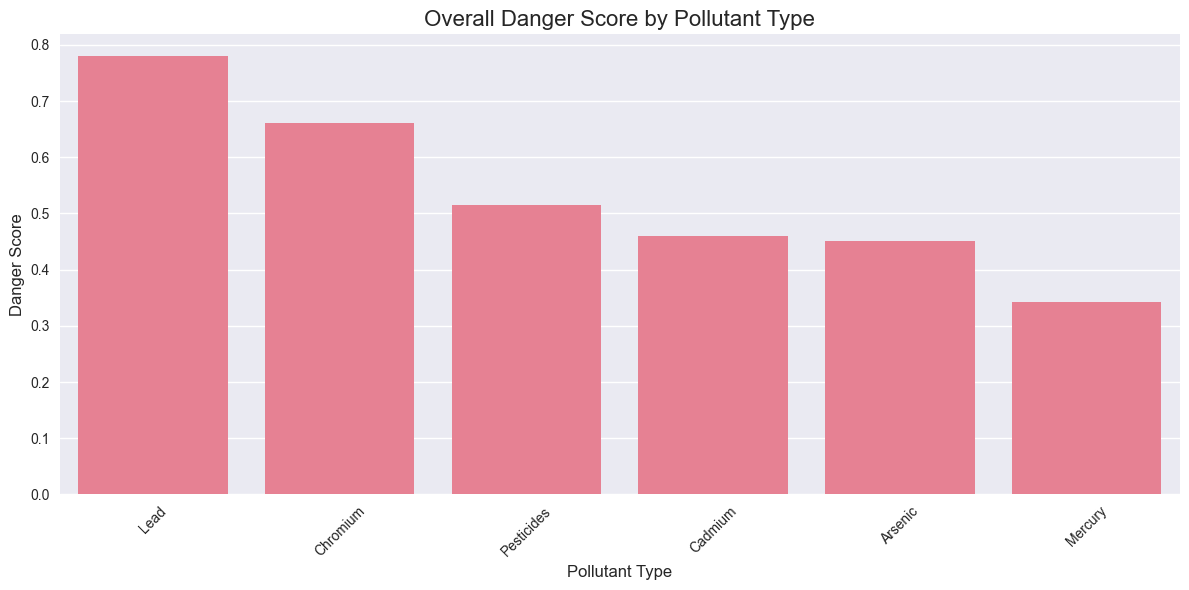

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x=pollutant_danger.index, y=pollutant_danger['Danger_Score'])
plt.title('Overall Danger Score by Pollutant Type', fontsize=16)
plt.xlabel('Pollutant Type', fontsize=12)
plt.ylabel('Danger Score', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusion and Findings

In [36]:
most_dangerous = pollutant_danger.index[0]
print(f"\nThe most dangerous pollutant is: {most_dangerous}")

print("""
Key Findings:

1. Pollutant Concentration: {} has the highest average concentration among all pollutants.

2. Health Impact: {} is associated with the most severe disease outcomes on average.

3. Geographic Distribution: Different pollutants dominate in different regions, suggesting localized pollution sources.

4. Environmental Factors: Soil pH and organic matter content show significant correlations with pollutant concentration.

5. Temporal Trends: [Describe any noticeable trends over time for different pollutants]

6. Cluster Analysis: The clustering revealed {} distinct patterns of pollution cases, each with unique characteristics.

Recommendations:
- Focus mitigation efforts on {} as it poses the highest overall danger
- Implement region-specific pollution control strategies based on the dominant pollutants
- Enhance monitoring of environmental factors that correlate strongly with pollution levels
- Develop targeted public health interventions for areas with high concentrations of dangerous pollutants
- Further research on the interaction between multiple pollutants and their combined effects
""".format(
    pollutant_danger['Pollutant_Concentration_mg_kg'].idxmax(),
    pollutant_danger['Severity_Score'].idxmax(),
    optimal_clusters,
    most_dangerous
))


The most dangerous pollutant is: Lead

Key Findings:

1. Pollutant Concentration: Pesticides has the highest average concentration among all pollutants.

2. Health Impact: Lead is associated with the most severe disease outcomes on average.

3. Geographic Distribution: Different pollutants dominate in different regions, suggesting localized pollution sources.

4. Environmental Factors: Soil pH and organic matter content show significant correlations with pollutant concentration.

5. Temporal Trends: [Describe any noticeable trends over time for different pollutants]

6. Cluster Analysis: The clustering revealed 4 distinct patterns of pollution cases, each with unique characteristics.

Recommendations:
- Focus mitigation efforts on Lead as it poses the highest overall danger
- Implement region-specific pollution control strategies based on the dominant pollutants
- Enhance monitoring of environmental factors that correlate strongly with pollution levels
- Develop targeted public health